In [138]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random as rand
from scipy import stats


import math
from matplotlib import colors
from matplotlib import patches

# Objective 1: Model random walkers trajectories that move in response to chemoattractants

In [139]:
# Initialize parameters of ABP model and locations first

#ABP model parameters: ballistic velocity, time step, rotational diffusion constant, translational diffusion constant
vel =10.0; dt = 1; Drot = 1; Dtrans = 0.1; Blen = 10;

# initialize arrays that store x,y and theta values, 
#as well as initial particle position and angle
num_steps = 1000;
num_walks = 5;
scaling = 1000;
 
start = [0,0];
nutrient_center = [2000, 2000] # point where nutrient is located
center_exponent, start_exponent = 8, 2
origin_to_center = 0 # distance from start to center, will be calculated later
saturation_conc = 10 ** 4 # saturation limit where further increases won't be sensed

In [140]:
# Define functions to be called later

# Calculates the distance from the random walkers current position (a) to the focal point of the nutrient (b)
def distance_to_nutrient(a,b):
    return math.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)

# Calculates concentration at current position
def calculate_conc(pos):
    dist = distance_to_nutrient(pos, nutrient_center)
    exponent = (1 - dist / origin_to_center) * (center_exponent - start_exponent) + start_exponent
    return 10 ** exponent

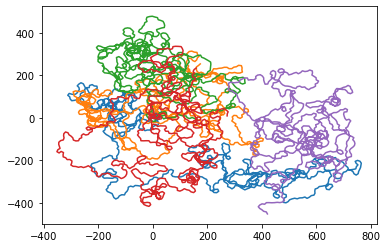

In [141]:
# Define how step will be taken in completely random walker

def ABP_step_rand():
    for j  in range(num_walks):
        
        xvec=np.zeros(0); yvec=np.zeros(0); thetavec = np.zeros(0);
        x=scaling*(rand()-0.5); y = 0.0; theta = (2*np.pi)*rand();
        
        # inner for loop is each step for a given walker/trajectory
        for i in range(num_steps):
                # calculate diffusive/random steps. For the x- and y-,we generate 
                #a random number between -1 & 1 to ensure that the walker can step in both directions(up/down and left/right).

                #dx = np.sqrt(2*Dtrans*dt)*2*; 
                dx = np.sqrt(2*Dtrans*dt)*2*(rand(1)-0.5); 

                dy= np.sqrt(2*Dtrans*dt)*2*(rand(1)-0.5); 

                #dtheta = np.sqrt(2*Drot*dt)*(2*np.pi)*(rand(1)-0.5);
                dtheta = np.sqrt(2*Drot*dt)*2*(rand(1)-0.5);

                # update coordinates (including ballistic step)
                x += vel*dt*np.cos(theta) + dx;
                y += vel*dt*np.sin(theta) + dy;


                # store successive positions in arrays
                xvec = np.append(xvec,x); yvec = np.append(yvec,y); 
                # update the angle and store in array
                theta += dtheta;
                thetavec = np.append(thetavec, theta);
        plt.plot(xvec,yvec, '-');
        #may want to change function so it only takes single step and records location
    
ABP_step_rand()

Initial proximity = 2828.42712474619
Initial concentration = 100.0
closer 
 new distance = 2819.05898876317  old distance = 2828.42712474619 
 new concentration = 104.6821942753215  old concentration = 100.0
further 
 new distance = 2826.637354853894  old distance = 2819.05898876317 
 new concentration = 100.87804922569187  old concentration = 104.6821942753215
closer 
 new distance = 2823.5381464399484  old distance = 2826.637354853894 
 new concentration = 102.41677332984146  old concentration = 100.87804922569187
closer 
 new distance = 2814.1490440508005  old distance = 2823.5381464399484 
 new concentration = 107.22310587402659  old concentration = 102.41677332984146
further 
 new distance = 2817.566343977299  old distance = 2814.1490440508005 
 new concentration = 105.44820593820326  old concentration = 107.22310587402659
further 
 new distance = 2824.24692910372  old distance = 2817.566343977299 
 new concentration = 102.06281302487783  old concentration = 105.44820593820326
fur

 new distance = 2970.5297334159104  old distance = 2961.7499827618803 
 new concentration = 49.95222589427313  old concentration = 52.14101835532022
further 
 new distance = 2972.4668109610857  old distance = 2970.5297334159104 
 new concentration = 49.4818220776975  old concentration = 49.95222589427313
closer 
 new distance = 2965.4611920919597  old distance = 2972.4668109610857 
 new concentration = 51.204348550259546  old concentration = 49.4818220776975
closer 
 new distance = 2956.2149047279986  old distance = 2965.4611920919597 
 new concentration = 53.56994280206181  old concentration = 51.204348550259546
closer 
 new distance = 2948.4356640581805  old distance = 2956.2149047279986 
 new concentration = 55.644653725131406  old concentration = 53.56994280206181
closer 
 new distance = 2938.4674164619973  old distance = 2948.4356640581805 
 new concentration = 58.42104089317024  old concentration = 55.644653725131406
closer 
 new distance = 2930.2680290836693  old distance = 2938

 new distance = 2993.6356125245998  old distance = 2993.7631998271627 
 new concentration = 44.621059070281056  old concentration = 44.593259764186726
further 
 new distance = 2995.583786380165  old distance = 2993.6356125245998 
 new concentration = 44.19846361856467  old concentration = 44.621059070281056
further 
 new distance = 3004.9722388905243  old distance = 2995.583786380165 
 new concentration = 42.217378076048355  old concentration = 44.19846361856467
further 
 new distance = 3013.0180179909685  old distance = 3004.9722388905243 
 new concentration = 40.59042353491491  old concentration = 42.217378076048355
closer 
 new distance = 3009.3298896186693  old distance = 3013.0180179909685 
 new concentration = 41.32827557268981  old concentration = 40.59042353491491
further 
 new distance = 3018.0234083295377  old distance = 3009.3298896186693 
 new concentration = 39.610064223886354  old concentration = 41.32827557268981
closer 
 new distance = 3016.636807446235  old distance = 

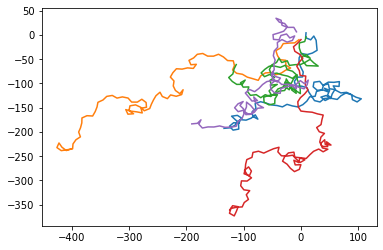

In [143]:
# Define how step will be taken in nutrient biased random walker

#ABP model parameters: ballistic velocity, time step, rotational diffusion constant, translational diffusion constant
vel =10.0; dt = 1; Drot = 1; Dtrans = 0.1; Blen = 10;

# initialize arrays that store x,y and theta values, 
#as well as initial particle position and angle
num_steps = 100;
num_walks = 5;
 
#start = [0,0]; #can maybe delete??
nutrient_center = [2000, 2000] # point where nutrient is located
nutrient_exponent, start_exponent = 8, 2
proximity = 0 # distance from start to center, will be calculated later
saturation_conc = 10 ** 4 # saturation limit where further increases won't be sensed


# Calculates the distance from the random walkers current position (a) to the focal point of the nutrient (b)
def distance_to_nutrient(a,b):
    return math.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)


# Calculates concentration at current position
def calculate_conc(pos):
    dist = distance_to_nutrient(pos, nutrient_center)
    initial_proximity = distance_to_nutrient([0,0],nutrient_center); #initialize proximity to nutrient at start
    exponent = (1 - dist / initial_proximity) * (nutrient_exponent - start_exponent) + start_exponent
    return 10 ** exponent



def ABP_step_biased():
    for j  in range(num_walks):

        xvec=np.zeros(0); yvec=np.zeros(0); thetavec = np.zeros(0);
        x=0.0; y = 0.0; theta = (2*np.pi)*rand();
        
        proximity = distance_to_nutrient([x,y],nutrient_center); #initialize proximity to nutrient at start
        print('Initial proximity =',proximity)
        concentration = calculate_conc([x,y])
        print('Initial concentration =',concentration)
        
        # inner for loop is each step for a given walker/trajectory        
        for i in range(num_steps):
                # calculate diffusive/random steps. For the x- and y-,we generate 
                #a random number between -1 & 1 to ensure that the walker can step in both directions(up/down and left/right).
                
                # calculate change in position
                #dx = np.sqrt(2*Dtrans*dt)*2*; 
                dx = np.sqrt(2*Dtrans*dt)*2*(rand(1)-0.5); 
                dy= np.sqrt(2*Dtrans*dt)*2*(rand(1)-0.5); 
                #dtheta = np.sqrt(2*Drot*dt)*(2*np.pi)*(rand(1)-0.5);
                dtheta = np.sqrt(2*Drot*dt)*2*(rand(1)-0.5);

                # update coordinates (including ballistic step)
                x += vel*dt*np.cos(theta) + dx;
                y += vel*dt*np.sin(theta) + dy;
#                 xvec = [0];
#                 yvec = [0];
            
                # store successive positions in arrays
                xvec = np.append(xvec,x); yvec = np.append(yvec,y); 
                # update the angle and store in array
                theta += dtheta;
                thetavec = np.append(thetavec, theta);
                
                                
                # calculate concentration at given proximity
                concentration_new = calculate_conc([x,y])
                concentration = np.append(concentration,concentration_new)
                
                
                # determine proximity to nutrient after step and say if its closer or not
                proximity_new = distance_to_nutrient([x,y],nutrient_center) # find proximity to nutrient after step
                proximity = np.append(proximity,proximity_new); # append proximity matrix with new proximity after step
                
                if proximity[-1] < proximity[-2]:
                    print('closer', '\n new distance =', proximity[-1], ' old distance =' ,proximity[-2], '\n' ' new concentration =',concentration[-1],' old concentration =',concentration[-2])
                    # store successive positions in arrays
                    xvec = np.append(xvec,x); yvec = np.append(yvec,y); 
                    # update the angle and store in array
                    theta += dtheta;
                    thetavec = np.append(thetavec, theta);
                else:
                    print('further','\n new distance =', proximity[-1], ' old distance =' ,proximity[-2], '\n' ' new concentration =',concentration[-1],' old concentration =',concentration[-2])
                # Now need to add attractive force that makes walker move based on distance/concentration of nutrient and adds that
                # change to the random walk, so final change is in x and y is x_rand + x_attract and y_rand + y_attract
                
                #print(x,y)
#                 print(xvec,yvec)
#                 print(xvec[-1],yvec[-1])
                
#         print('x_position=',xvec)
#         print('y_position=',yvec)
#         print('theta_angle=',thetavec)
#         print('proximity=',proximity)

        plt.plot(xvec,yvec, '-');
        #may want to change function so it only takes single step and records location
    
ABP_step_biased()

In [82]:
#BACKUP DO NOT TOUCH
# Define how step will be taken in nutrient biased random walker
# Experimental version with added concentration checks


#ABP model parameters: ballistic velocity, time step, rotational diffusion constant, translational diffusion constant
vel =10.0; dt = 1; Drot = 1; Dtrans = 0.1; Blen = 10;

# initialize arrays that store x,y and theta values, 
#as well as initial particle position and angle
num_steps = 5;
num_walks = 1;
 
#start = [0,0]; #can maybe delete??
nutrient_center = [2000, 2000] # point where nutrient is located
nutrient_exponent, start_exponent = 8, 2
proximity = 0 # distance from start to center, will be calculated later
saturation_conc = 10 ** 4 # saturation limit where further increases won't be sensed


# Calculates the distance from the random walkers current position (a) to the focal point of the nutrient (b)
def distance_to_nutrient(a,b):
    return math.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)


# Calculates concentration at current position
def calculate_conc(pos):
    dist = distance_to_nutrient(pos, nutrient_center)
    initial_proximity = distance_to_nutrient([0,0],nutrient_center); #initialize proximity to nutrient at start
    exponent = (1 - dist / initial_proximity) * (nutrient_exponent - start_exponent) + start_exponent
    return 10 ** exponent

def check_conc(x,y):
    proximity = distance_to_nutrient([x,y],nutrient_center); #initialize proximity to nutrient at start
    print('Initial proximity =',proximity)
    concentration = calculate_conc([x,y])
    print('Initial concentration =',concentration)

    # calculate concentration at given proximity
    concentration_new = calculate_conc([x,y])
    concentration = np.append(concentration,concentration_new)


    # determine proximity to nutrient after step and say if its closer or not
    proximity_new = distance_to_nutrient([x,y],nutrient_center) # find proximity to nutrient after step
    proximity = np.append(proximity,proximity_new); # append proximity matrix with new proximity after step

    if proximity[-1] < proximity[-2]:
        print('closer', '\n new distance =', proximity[-1], ' old distance =' ,proximity[-2], '\n' ' new concentration =',concentration[-1],' old concentration =',concentration[-2])
    else:
        print('further','\n new distance =', proximity[-1], ' old distance =' ,proximity[-2], '\n' ' new concentration =',concentration[-1],' old concentration =',concentration[-2])



def ABP_step_biased():
    for j  in range(num_walks):

        xvec=np.zeros(0); yvec=np.zeros(0); thetavec = np.zeros(0);
        x=0.0; y = 0.0; theta = (2*np.pi)*rand();
        
#         proximity = distance_to_nutrient([x,y],nutrient_center); #initialize proximity to nutrient at start
#         print('Initial proximity =',proximity)
#         concentration = calculate_conc([x,y])
#         print('Initial concentration =',concentration)
        
        # inner for loop is each step for a given walker/trajectory        
        for i in range(num_steps):
                # calculate diffusive/random steps. For the x- and y-,we generate 
                #a random number between -1 & 1 to ensure that the walker can step in both directions(up/down and left/right).
                
                # calculate change in position
                #dx = np.sqrt(2*Dtrans*dt)*2*; 
                dx = np.sqrt(2*Dtrans*dt)*2*(rand(1)-0.5); 
                dy= np.sqrt(2*Dtrans*dt)*2*(rand(1)-0.5); 
                #dtheta = np.sqrt(2*Drot*dt)*(2*np.pi)*(rand(1)-0.5);
                dtheta = np.sqrt(2*Drot*dt)*2*(rand(1)-0.5);

                # update coordinates (including ballistic step)
                x += vel*dt*np.cos(theta) + dx;
                y += vel*dt*np.sin(theta) + dy;
#                 xvec = [0];
#                 yvec = [0];
            
                # store successive positions in arrays
                xvec = np.append(xvec,x); yvec = np.append(yvec,y); 
                # update the angle and store in array
                theta += dtheta;
                thetavec = np.append(thetavec, theta);
                
                
                check_conc(x,y)
                
#                 # calculate concentration at given proximity
#                 concentration_new = calculate_conc([x,y])
#                 concentration = np.append(concentration,concentration_new)
                
                
#                 # determine proximity to nutrient after step and say if its closer or not
#                 proximity_new = distance_to_nutrient([x,y],nutrient_center) # find proximity to nutrient after step
#                 proximity = np.append(proximity,proximity_new); # append proximity matrix with new proximity after step
                
#                 if proximity[-1] < proximity[-2]:
#                     print('closer', '\n new distance =', proximity[-1], ' old distance =' ,proximity[-2], '\n' ' new concentration =',concentration[-1],' old concentration =',concentration[-2])
#                 else:
#                     print('further','\n new distance =', proximity[-1], ' old distance =' ,proximity[-2], '\n' ' new concentration =',concentration[-1],' old concentration =',concentration[-2])
                
                
                #print(x,y)
#                 print(xvec,yvec)
#                 print(xvec[-1],yvec[-1])
                
#         print('x_position=',xvec)
#         print('y_position=',yvec)
#         print('theta_angle=',thetavec)
#         print('proximity=',proximity)

        plt.plot(xvec,yvec, '-');
        #may want to change function so it only takes single step and records location
    
ABP_step_biased()

Initial proximity = 2828.42712474619
new_prox = 2828.42712474619
Concentration = 100.0


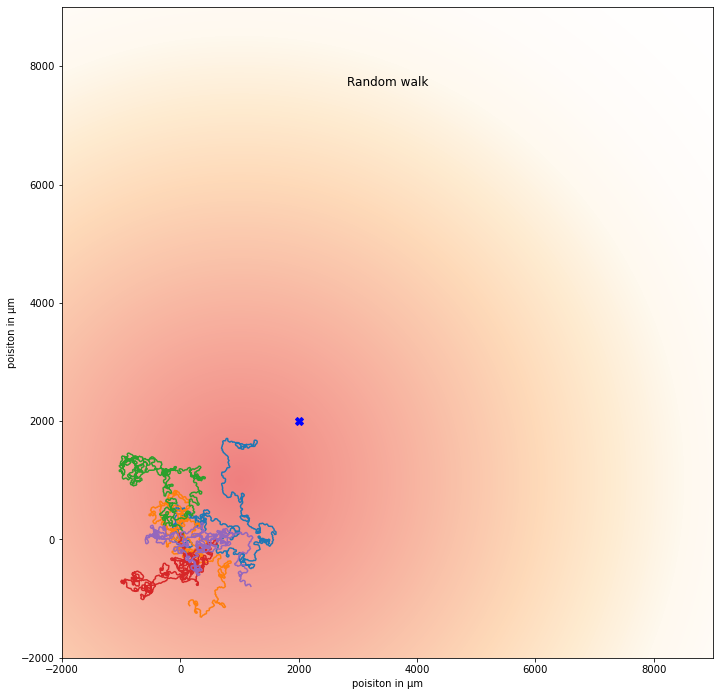

In [33]:
# Make plot of chemoattractant gradient
plot_lim_x = [-2000,9000];
plot_lim_y = [-2000,9000];

origin_to_center = distance_to_nutrient(start, nutrient_center) #Update the global constant

#Below are all for plotting purposes
methods = ["Pure random walk", "Nutrient attractant walk"]
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

#First set color map
mycolor = [[256, 256, 256], [256, 255, 254], [256, 253, 250], [256, 250, 240], [255, 236, 209], [255, 218, 185], [251, 196, 171], [248, 173, 157], [244, 151, 142], [240, 128, 128]] #from coolors：）
for i in mycolor:
    for j in range(len(i)):
        i[j] *= (1/256)
cmap_color = colors.LinearSegmentedColormap.from_list('my_list', mycolor) #Linearly segment these colors to create a continuous color map

#Store the concentrations for each integer position in a matrix
m = 11000
conc_matrix = np.zeros((m, m)) #we will display from [-1000, -1000] to [3000, 3000]
for i in range(m):
    for j in range(m):
        conc_matrix[i][j] = math.log(calculate_conc([i - 1000, j - 1000]))


#Simulate the gradient distribution, plot as a heatmap
ax.imshow(conc_matrix.T, cmap=cmap_color, interpolation='nearest', extent = [plot_lim_x[0], plot_lim_x[1], plot_lim_y[0], plot_lim_y[1]], origin = 'lower')

ax.plot(nutrient_center[0], nutrient_center[1], 'bX', markersize = 8) #Mark the highest concentration point [1500, 1500]
ax.set_title("Random walk".format(), x = 0.5, y = 0.87)
ax.set_xlim(plot_lim_x[0], plot_lim_x[1])
ax.set_ylim(plot_lim_y[0], plot_lim_y[1])
ax.set_xlabel("poisiton in μm")
ax.set_ylabel("poisiton in μm")

ABP_step_rand()
fig.tight_layout()
plt.show()

In [38]:
# Test function to find distance and concentration given a fixed position

#Run simulation for 3 cells for each strategy, plot paths
duration = 800   #seconds, duration of the simulation
num_cells = 3
origin_to_center = distance_to_nutrient(start, ligand_center) #Update the global constant
run_time_expected = 1.0

paths_rand = simulate_std_random(num_cells, duration, run_time_expected)
paths_che = simulate_chemotaxis(num_cells, duration, run_time_expected)
paths = np.array([paths_rand, paths_che])

array([ 0.13376151, -0.72671077, -1.18699484, -2.53394858, -2.86054402,
       -3.52442707, -4.06577125, -3.27804419, -2.07537314, -1.03672932,
        0.18761095,  1.17809596,  1.90665544,  3.10216468,  3.02565181,
        3.60288762,  3.89143827,  3.36135668,  2.4828155 ,  2.05134856,
        3.00385215,  4.02203767,  4.65843678,  5.78729995,  6.63687567,
        6.87941371,  7.66900158,  8.837835  , 10.08022406, 10.89897669,
       11.34811938, 12.1781651 , 11.31417734, 12.26067849, 12.75341326,
       12.60878023, 13.67609988, 13.71821102, 14.33514177, 14.34734519,
       14.84475771, 15.67472773, 16.03502844, 16.68723171, 17.6332319 ,
       17.48900747, 16.59086169, 15.90739851, 15.64381318, 14.30152883,
       14.10440588, 13.78726876, 14.02238334, 14.17822613, 14.30064789,
       15.11563618, 15.38604349, 15.83585556, 16.18862757, 17.04137068,
       17.52823679, 17.47406759, 16.91078911, 15.78210902, 14.55812681,
       13.94165149, 13.73542589, 14.97572675, 15.65866931, 16.36